In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='nypdf', src=FILE, fpath='./hce_data/nypdf/nypdf.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.010362625122070312] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "KY_CD": "numeric",
    "OFNS_DESC": "text",
    "PD_CD": "numeric",
    "PD_DESC": "text",
    "CRM_ATPT_CPTD_CD": "categorical",
    "LAW_CAT_CD": "categorical",
    "JURIS_DESC": "text",
    "BORO_NM": "categorical",
    "ADDR_PCT_CD": "numeric",
    "LOC_OF_OCCUR_DESC": "categorical",
    "PREM_TYP_DESC": "text",
    "PARKS_NM": "text",
    "HADEVELOPT": "text",
    "X_COORD_CD": "numeric",
    "Y_COORD_CD": "numeric",
    "Latitude": "numeric",
    "Longitude": "numeric"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'KY_CD': ['equal'], 'OFNS_

In [4]:
pf.session.load_embedding(save=True, path='./hce_data/nypdf/', load=True)

INFO:profiler.utility:[0.5919451713562012] Load Embedding start

INFO:profiler.utility:[0.654350757598877] Load Embedding execution time: 0.06240558624267578



In [5]:
pf.session.load_training_data(multiplier = None, difference=True)

INFO:profiler.utility:[0.6606242656707764] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 1 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 1, and the bound is 0.00035023
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 17/17 [00:01<00:00, 16.85it/s]
INFO:profiler.data.transformer:Number of training samples: 584494
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[445.09420466423035] Create Training Data execution time: 444.43358039855957



In [6]:
# set sparsity to 0 for exp_reproduce 
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[445.14872646331787] Learn Structure start

INFO:profiler.learner:use threshold 0.6362
INFO:profiler.utility:[446.81065702438354] Learn Structure execution time: 1.6619305610656738



In [7]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[446.8173201084137] Get Dependencies start



PD_CD -> HADEVELOPT (0.14411664263985646)
PD_CD,HADEVELOPT -> PARKS_NM (0.10002178706365672)
PD_CD,HADEVELOPT -> Longitude (9.408043194292038e-05)
PD_CD,HADEVELOPT,PARKS_NM,Longitude -> KY_CD (0.05376699398849406)
PD_CD,HADEVELOPT,PARKS_NM,Longitude,KY_CD -> OFNS_DESC (0.0038942829833693835)
PD_CD,PARKS_NM,OFNS_DESC -> PD_DESC (1.8346645134153588e-05)
PARKS_NM,Longitude,OFNS_DESC,PD_DESC -> CRM_ATPT_CPTD_CD (0.03563190415166535)
PD_CD,PARKS_NM,Longitude,KY_CD,CRM_ATPT_CPTD_CD -> X_COORD_CD (1.5366533743123722e-05)
PD_CD,HADEVELOPT,PARKS_NM,Longitude,X_COORD_CD -> Y_COORD_CD (1.5183066564064897e-05)
PD_CD,HADEVELOPT,Longitude,OFNS_DESC,CRM_ATPT_CPTD_CD,X_COORD_CD,Y_COORD_CD -> Latitude (1.3487215474363427e-06)
PD_CD,HADEVELOPT,PARKS_NM,OFNS_DESC,Latitude -> PREM_TYP_DESC (0.12250875236296477)
HADEVELOPT,PARKS_NM,Longitude,KY_CD,Y_COORD_CD,PREM_TYP_DESC -> JURIS_DESC (0.0802299775409137)
PD_CD,PARKS_NM,Latitude,PREM_TYP_DESC -> LOC_OF_OCCUR_DESC (0.24140995870335297)
PARKS_NM,PD_DESC,X_C

INFO:profiler.utility:[447.56774044036865] Get Dependencies execution time: 0.750420331954956




PARKS_NM,Longitude,KY_CD -> LAW_CAT_CD (0.22458939729651467)
{'PD_CD': array([], dtype=object), 'HADEVELOPT': array(['PD_CD'], dtype=object), 'PARKS_NM': array(['PD_CD', 'HADEVELOPT'], dtype=object), 'Longitude': array(['PD_CD', 'HADEVELOPT'], dtype=object), 'KY_CD': array(['PD_CD', 'HADEVELOPT', 'PARKS_NM', 'Longitude'], dtype=object), 'OFNS_DESC': array(['PD_CD', 'HADEVELOPT', 'PARKS_NM', 'Longitude', 'KY_CD'],
      dtype=object), 'PD_DESC': array(['PD_CD', 'PARKS_NM', 'OFNS_DESC'], dtype=object), 'CRM_ATPT_CPTD_CD': array(['PARKS_NM', 'Longitude', 'OFNS_DESC', 'PD_DESC'], dtype=object), 'X_COORD_CD': array(['PD_CD', 'PARKS_NM', 'Longitude', 'KY_CD', 'CRM_ATPT_CPTD_CD'],
      dtype=object), 'Y_COORD_CD': array(['PD_CD', 'HADEVELOPT', 'PARKS_NM', 'Longitude', 'X_COORD_CD'],
      dtype=object), 'Latitude': array(['PD_CD', 'HADEVELOPT', 'Longitude', 'OFNS_DESC',
       'CRM_ATPT_CPTD_CD', 'X_COORD_CD', 'Y_COORD_CD'], dtype=object), 'PREM_TYP_DESC': array(['PD_CD', 'HADEVELOPT', 'PAR

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


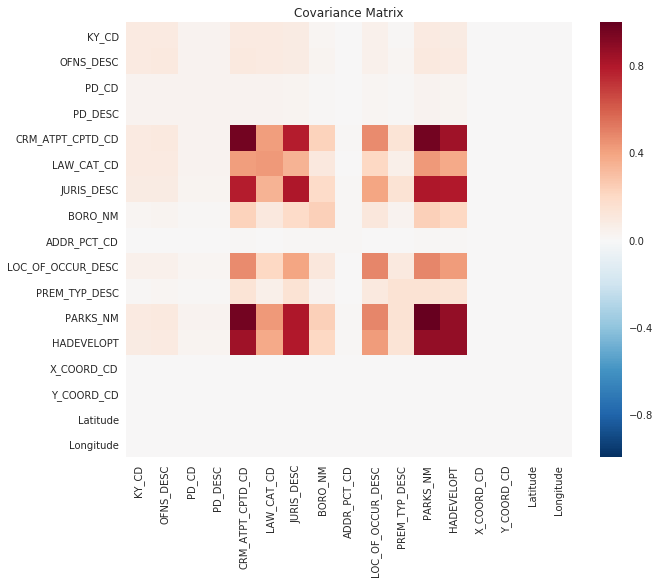

In [8]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


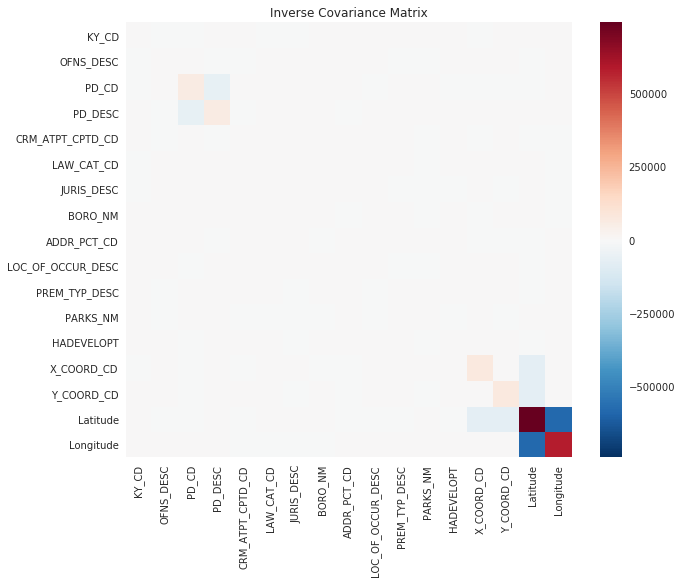

none-zero pairs of abs inv


In [9]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


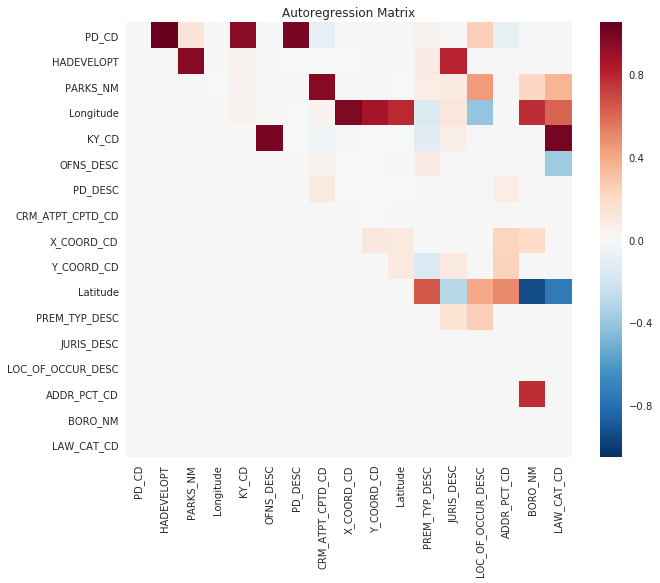

In [10]:
pf.session.visualize_autoregression()

In [11]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.010363,start: Load Data,0.000000
1,0.585275,end: Load Data,0.574913
2,0.591945,start: Load Embedding,0.000000
3,0.654351,end: Load Embedding,0.062406
4,0.660624,start: Create Training Data,0.000000
5,445.094205,end: Create Training Data,444.433580
6,445.148726,start: Learn Structure,0.000000
7,446.810657,end: Learn Structure,1.661931
8,446.817320,start: Get Dependencies,0.000000
9,447.567740,end: Get Dependencies,0.750420


In [12]:
pf.session.timer.to_csv()